# Imports and Setup

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import RobustScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, accuracy_score, classification_report

import warnings
warnings.filterwarnings("ignore")

# Load and Explore Dataset

In [ ]:
# Load the dataset
df = pd.read_csv('../datasets/raw/student_lifestyle_dataset.csv')

In [ ]:
# Display basic information about the dataset
print("Shape of the dataset:", df.shape)
display(df.head())
print("\nDataset Information:")
print(df.info())
print("\nStatistical Summary:")
display(df.describe().T)

Shape of the dataset: (2000, 8)


,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level
0,1,6.9,3.8,8.7,2.8,1.8,2.99,Moderate
1,2,5.3,3.5,8.0,4.2,3.0,2.75,Low
2,3,5.1,3.9,9.2,1.2,4.6,2.67,Low
3,4,6.5,2.1,7.2,1.7,6.5,2.88,Moderate
4,5,8.1,0.6,6.5,2.2,6.6,3.51,High



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Student_ID                       2000 non-null   int64  
 1   Study_Hours_Per_Day              2000 non-null   float64
 2   Extracurricular_Hours_Per_Day    2000 non-null   float64
 3   Sleep_Hours_Per_Day              2000 non-null   float64
 4   Social_Hours_Per_Day             2000 non-null   float64
 5   Physical_Activity_Hours_Per_Day  2000 non-null   float64
 6   GPA                              2000 non-null   float64
 7   Stress_Level                     2000 non-null   object 
dtypes: float64(6), int64(1), object(1)
memory usage: 125.1+ KB
None

Statistical Summary:


,count,mean,std,min,25%,50%,75%,max
Student_ID,2000.0,1000.50000,577.494589,1.00,500.75,1000.50,1500.25,2000.0
Study_Hours_Per_Day,2000.0,7.47580,1.423888,5.00,6.30,7.40,8.70,10.0
Extracurricular_Hours_Per_Day,2000.0,1.99010,1.155855,0.00,1.00,2.00,3.00,4.0
Sleep_Hours_Per_Day,2000.0,7.50125,1.460949,5.00,6.20,7.50,8.80,10.0
Social_Hours_Per_Day,2000.0,2.70455,1.688514,0.00,1.20,2.60,4.10,6.0
Physical_Activity_Hours_Per_Day,2000.0,4.32830,2.514110,0.00,2.40,4.10,6.10,13.0
GPA,2000.0,3.11596,0.298674,2.24,2.90,3.11,3.33,4.0


General Information

Dataset Size

* **Rows:** 2,000
* **Columns:** 8
* All columns are complete with no missing data

Data Types

* **Numeric Columns:** 6 (covering study, sleep, physical activity hours, and GPA)
* **Categorical Column:** 1 (**Stress_Level**)
* **ID Column:** 1 (**Student_ID**)

Initial Observations

Balanced Lifestyle

* On average, students spend similar amounts of time on studying, sleeping, and exercising, suggesting a fairly balanced daily routine.

GPA and Lifestyle

* The relatively high average GPA hints at a possible positive link between balanced habits—such as adequate sleep and study time—and academic results.

Stress Levels

* **Stress_Level** can be examined to explore connections with GPA and other lifestyle variables.

Outliers

* Some students have very high **Physical_Activity_Hours**, up to 13 hours per day.
* **Social_Hours** vary widely, reaching up to 6 hours daily, showing diverse social behaviors.


In [ ]:
# Check for missing and duplicated values
print(f'\nMissing values: {df.isna().sum().sum()}')
print(f'Duplicated values: {df.duplicated().sum()}')


Missing values: 0
Duplicated values: 0


Missing and Duplicated Values

* **Missing Values:** 0.
  The dataset has no missing entries; every column is fully populated.

* **Duplicated Values:** 0.
  There are no repeated rows, ensuring each record is unique.


In [ ]:
# Display the number of unique values in each column
print("\nUnique Values in Each Column:")
print(df.nunique())


Unique Values in Each Column:
Student_ID                         2000
Study_Hours_Per_Day                  51
Extracurricular_Hours_Per_Day        41
Sleep_Hours_Per_Day                  51
Social_Hours_Per_Day                 61
Physical_Activity_Hours_Per_Day     118
GPA                                 158
Stress_Level                          3
dtype: int64


In [ ]:
# Separate numerical and categorical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
non_numerical_columns = df.select_dtypes(include=['object']).columns.tolist()

# Display the lists of numerical and categorical columns
print("\nNumerical Columns:", numerical_columns)
print("Categorical Columns:", non_numerical_columns)


Numerical Columns: ['Student_ID', 'Study_Hours_Per_Day', 'Extracurricular_Hours_Per_Day', 'Sleep_Hours_Per_Day', 'Social_Hours_Per_Day', 'Physical_Activity_Hours_Per_Day', 'GPA']
Categorical Columns: ['Stress_Level']


In [ ]:
# Display unique values for each categorical column
for col in non_numerical_columns:
    print(f"\nColumn: {col}")
    print(f"Unique Values: {df[col].unique()}")


Column: Stress_Level
Unique Values: ['Moderate' 'Low' 'High']


Insights from Unique Value Exploration

Data Variety

* **Numerical Columns:** Features like **Study_Hours_Per_Day**, **Sleep_Hours_Per_Day**, and **Physical_Activity_Hours_Per_Day** show a wide range of unique values (51–118), reflecting varied daily routines among students.
* **GPA:** With 158 distinct values, academic performance is captured in a detailed and granular way.

Categorical Feature

* **Stress_Level:** Restricted to three categories (**Low**, **Moderate**, **High**), making it well-suited for classification and categorical analysis.

Unique Student Records

* Each student has a unique **Student_ID**, ensuring no duplicates and clear tracking for individual analysis.

Lifestyle Activities

* **Physical Activity:** The largest number of unique values (118) among lifestyle features, showing differences in students’ engagement with exercise.
* **Social Hours:** 61 unique values, highlighting the variety in social interactions.

Analysis Opportunities

* **Clustering Potential:** The wide ranges in **Study_Hours_Per_Day**, **Extracurricular_Hours_Per_Day**, and **Sleep_Hours_Per_Day** allow for grouping students based on lifestyle patterns.
* **GPA Granularity:** Detailed GPA values support precise performance analysis and modeling.
* **Balanced Categorical Data:** The three stress levels make it easy to study relationships between stress and lifestyle or academic features.


# Data Preprocessing

Creating New Features for Deeper Insights

In [ ]:
# Creating New Features for Deeper Insights

# Define a function to categorize academic performance based on GPA
def categorize_academic_performance(gpa):
    if gpa >= 3.5:
        return 'Excellent'
    elif 3.0 <= gpa < 3.5:  
        return 'Good'
    elif 2.0 <= gpa < 3.0:  
        return 'Fair'
    else:
        return 'Poor'

# Apply the function to create a new column for academic performance
df['Academic_Performance'] = df['GPA'].apply(categorize_academic_performance)

# Display the counts of each category for verification
academic_performance_counts = df['Academic_Performance'].value_counts()

# Display the results
academic_performance_counts

Academic_Performance
Good         1067
Fair          712
Excellent     221
Name: count, dtype: int64

Academic Performance Categorization

The **Academic Performance** feature has been grouped as follows:

* **Good (3.0 – 3.49):** 1,067 students
* **Fair (2.0 – 2.99):** 712 students
* **Excellent (3.5 – 4.0):** 221 students
* **Poor (< 2.0):** 0 students

This distribution shows that most students fall within the **Good** and **Fair** GPA ranges, with very few achieving **Excellent** scores and none in the **Poor** category.


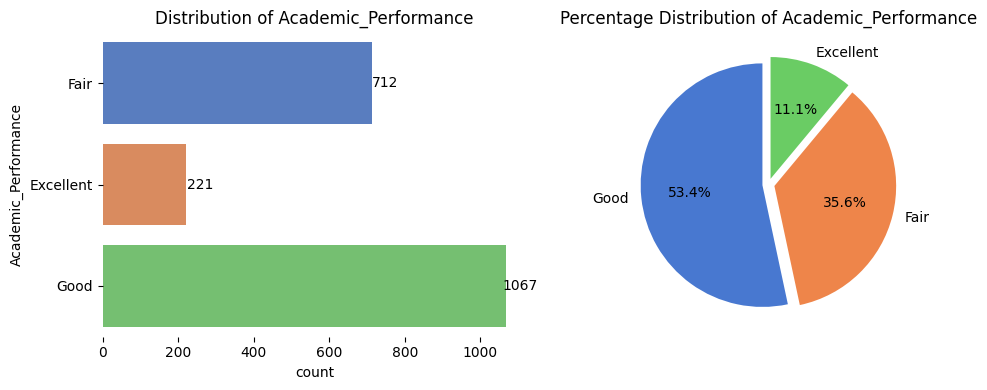

In [ ]:
column_name = 'Academic_Performance'
plt.figure(figsize=(10, 4))

# First subplot: Count plot
plt.subplot(1, 2, 1)
sns.countplot(y=column_name, data=df, palette='muted')  
plt.title(f'Distribution of {column_name}')

ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}', (p.get_width(), p.get_y() + p.get_height() / 2), 
                ha='center', va='center', xytext=(10, 0), textcoords='offset points')

sns.despine(left=True, bottom=True)

# Second subplot: Pie chart
plt.subplot(1, 2, 2)
df[column_name].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('muted'), startangle=90, explode=[0.05]*df[column_name].nunique())
plt.title(f'Percentage Distribution of {column_name}')
plt.ylabel('')  

plt.tight_layout()
plt.show()

Insights from Academic Performance Distribution

* **Good (53.4%):** Most students have a GPA between 3.0 – 3.49, making this the largest group.
* **Fair (35.6%):** A considerable portion falls in the 2.0 – 2.99 range.
* **Excellent (11.1%):** Only a small fraction achieves top GPAs of 3.5 – 4.0.
* **Poor (0%):** No students have a GPA below 2.0.

**Key Observations**

* The majority of students perform well academically but do not reach the highest level.
* There is potential to support "Good" students in improving toward the "Excellent" category.


In [ ]:
# Encoding Stress_Level and Academic_Performance with explicit ordinal mappings

# Mapping for Stress_Level (ordinal encoding)
mapping_stress = {'Low': 0, 'Moderate': 1, 'High': 2}
df['Stress_Level_Encoded'] = df['Stress_Level'].map(mapping_stress)

# Mapping for Academic_Performance (ordinal encoding)
mapping_performance = {'Poor': 0, 'Fair': 1, 'Good': 2, 'Excellent': 3}
df['Academic_Performance_Encoded'] = df['Academic_Performance'].map(mapping_performance)

# Display the first few rows of the dataset to verify the new columns
df[['Stress_Level', 'Stress_Level_Encoded', 'Academic_Performance', 'Academic_Performance_Encoded']].head(10)

,Stress_Level,Stress_Level_Encoded,Academic_Performance,Academic_Performance_Encoded
0,Moderate,1,Fair,1
1,Low,0,Fair,1
2,Low,0,Fair,1
3,Moderate,1,Fair,1
4,High,2,Excellent,3
5,Moderate,1,Fair,1
6,High,2,Good,2
7,High,2,Good,2
8,Low,0,Fair,1
9,Moderate,1,Fair,1


In [ ]:
# Drop the original categorical columns
df = df.drop(columns=['Stress_Level', 'Academic_Performance'])

# Verify the updated dataset
df.head()

,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level_Encoded,Academic_Performance_Encoded
0,1,6.9,3.8,8.7,2.8,1.8,2.99,1,1
1,2,5.3,3.5,8.0,4.2,3.0,2.75,0,1
2,3,5.1,3.9,9.2,1.2,4.6,2.67,0,1
3,4,6.5,2.1,7.2,1.7,6.5,2.88,1,1
4,5,8.1,0.6,6.5,2.2,6.6,3.51,2,3


In [ ]:
# Creating a table for correlation of the target variable 'Stress_Level_Encoded' with other features
target_variable = 'Stress_Level_Encoded'
target_correlation_table = df.corr()[[target_variable]].sort_values(by=target_variable, ascending=False)

# Displaying the table
target_correlation_table

,Stress_Level_Encoded
Stress_Level_Encoded,1.000000
Study_Hours_Per_Day,0.738843
GPA,0.550395
Academic_Performance_Encoded,0.504442
Student_ID,0.003306
Extracurricular_Hours_Per_Day,-0.006099
Social_Hours_Per_Day,-0.054702
Physical_Activity_Hours_Per_Day,-0.205207
Sleep_Hours_Per_Day,-0.298917


Insights from the Correlation Table (Target: Stress_Level_Encoded)

**Positive Correlations**

* **Study_Hours_Per_Day (0.7388):** Strongest positive correlation; students with higher stress tend to study more.
* **GPA (0.5504):** Moderate positive correlation; higher stress is linked to better academic performance.
* **Academic_Performance_Encoded (0.5044):** Students with higher stress often belong to higher academic categories (Good, Excellent).

**Weak Positive Correlation**

* **Student_ID (0.0033):** Negligible correlation, as expected.

**Negative Correlations**

* **Sleep_Hours_Per_Day (-0.2989):** Moderate negative correlation; higher stress reduces sleep duration.
* **Physical_Activity_Hours_Per_Day (-0.2052):** Students with higher stress engage in less exercise.
* **Social_Hours_Per_Day (-0.0547):** Slight negative correlation; high-stress students socialize a little less.
* **Extracurricular_Hours_Per_Day (-0.0061):** Very weak negative correlation; extracurricular activities have minimal effect on stress.


In [ ]:
# Define the features (X) and the target variable (y)
X = df.drop(columns=['Student_ID', 'Stress_Level_Encoded'])  
y = df['Stress_Level_Encoded']  

# Display shapes to confirm the split
print("X Shape:", X.shape)
print("\ny Shape:", y.shape)

X Shape: (2000, 7)

y Shape: (2000,)


In [ ]:
# Outlier detection using Isolation Forest
iso_forest = IsolationForest(contamination=0.01, random_state=42)
outlier_predictions = iso_forest.fit_predict(X)

# Identify outliers: Isolation Forest marks outliers as -1
outlier_indices = X.index[outlier_predictions == -1]

# Print the number of outliers detected
print(f"Number of detected outliers: {len(outlier_indices)}")

Number of detected outliers: 20


In [ ]:
# Remove outliers
X_filtered = X.drop(outlier_indices, axis=0).reset_index(drop=True)
y_filtered = y.drop(outlier_indices, axis=0).reset_index(drop=True)

print(f"New shape of X after removing outliers: {X_filtered.shape}")
print(f"New shape of y after removing outliers: {y_filtered.shape}")

New shape of X after removing outliers: (1980, 7)
New shape of y after removing outliers: (1980,)


In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.2, random_state=42)

# Display the shapes of the splits for verification
print("X_train Shape:", X_train.shape)
print("X_test Shape:", X_test.shape)
print("y_train Shape:", y_train.shape)
print("y_test Shape:", y_test.shape)

X_train Shape: (1584, 7)
X_test Shape: (396, 7)
y_train Shape: (1584,)
y_test Shape: (396,)


In [ ]:
# Apply RobustScaler
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)